<a href="https://colab.research.google.com/github/gurjaspalbedi/deep-learning/blob/master/Assignment1_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:

import torch
print('Torch', torch.__version__, 'CUDA', torch.version.cuda)
print('Device:', torch.device('cuda:0'))
print(torch.cuda.is_available())

from torch.autograd import Variable
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')

Torch 1.0.0 CUDA 9.0.176
Device: cuda:0
True


In [133]:
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

BATCH= 4
transform = transforms.ToTensor()

train_set = torchvision.datasets.MNIST(
    'mnist_data',
    transform=transform,
    train= True, 
    download=True)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=BATCH)

test_set = torchvision.datasets.MNIST(
    'mnist_data',
    transform=transform,
    train= False, 
    download=True)

test_loader = torch.utils.data.DataLoader(test_set,batch_size=BATCH)
len(test_loader)

2500

In [134]:
first_iter = next(iter(train_set))
image , label = first_iter
print(image.shape)

torch.Size([1, 28, 28])


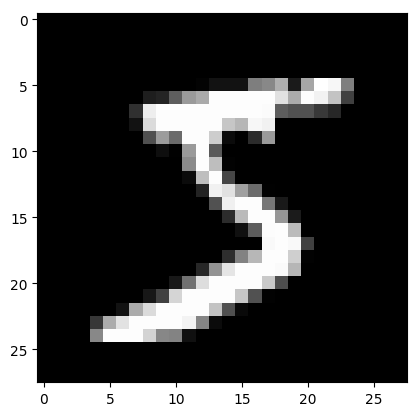

In [135]:
plt.imshow(image.squeeze(), cmap="gray")

In [0]:
import torch.nn as nn


In [0]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.input_layer = nn.Linear(28*28, 1024)
    self.hidden_layer1 = nn.Linear(1024, 1024)
    self.hidden_layer2 = nn.Linear(1024, 1024)
    self.hidden_layer3 = nn.Linear(1024, 1024)
    self.hidden_layer4 = nn.Linear(1024, 1024)
    self.hidden_layer5 = nn.Linear(1024, 1024)
    self.output_layer = nn.Linear(1024, 10)
    
    self.activation = nn.Softmax()

  def forward(self, data):

    data = data.view(BATCH, -1).cuda()
    output = self.activation(self.input_layer(data))
    output = self.activation(self.hidden_layer1(output))
    output = self.activation(self.hidden_layer1(output))
    output = self.activation(self.hidden_layer1(output))
    output = self.activation(self.hidden_layer1(output))
    final_output = self.hidden_layer5(output)
    return final_output


  
  


In [138]:
neural_network = NeuralNet().cuda()
loss_function = nn.CrossEntropyLoss()
para = neural_network.parameters()
optimizer = torch.optim.Adam(params=para, lr=0.01)

for i, data in enumerate(train_loader):
  images, labels = data
  optimizer.zero_grad()
  outputs = neural_network(images.cuda())
#   outputs = output.long()
  loss_f = loss_function(outputs.cuda(), labels.cuda())
  loss_f.backward()
  optimizer.step()

# correct  = 0
# total = 0
# with torch.no_grad():
#   for data in test_loader:
#     images, labels = data
#     outputs = net(images)
#     _, predicted = torch.max(outputs.data, 1)
#     total += labels.size(0)
#     correct += (predicted == labels).sum().item()

# print('Accuracy of the network on the 10000 test images: %d %%' % (
#     100 * correct / total))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [139]:
correct  = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    images.cuda()
    labels.cuda()
    outputs = neural_network(images)
    _, predicted = torch.max(outputs.data.cuda(), 1)
    _.cuda()
    predicted.cuda()
    total += labels.size(0)
    correct += (predicted.cuda() == labels.cuda()).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 49 %
